# Plate Tectonics and Earthquakes

Using Jupyter Notebooks, we can perform investigations and share our results easily.

This notebook contains some simple scripts which will help us to understand present day plate tectonics in terms of where earthquakes occur relative to plate boundaries.

This tutorial is based on outlines of tectonic plates from here:

1) Müller, R. D, Seton, M., Zahirovic, S., Williams, S.E., Matthews, K.J., Wright, N.M., Shephard, G.E., Maloney, K.Y., Barnett-Moore, N., Hosseinpour, M., Bower, D.J., Cannon, J., 2016, Ocean basin evolution and global-scale plate reorganization events since Pangea breakup, Annual Review of Earth and Planetary Science, Vol 44, 107-138.
https://www.researchgate.net/publication/284179323_Ocean_Basin_Evolution_and_Global-Scale_Plate_Reorganization_Events_Since_Pangea_Breakup

Any tectonic element that moved as separate tectonic plate in the last 200 million years is outlined separately here, as opposed to only those plates that are active today.  This helps to outline ancient suture zones between plates, where earthquakes may still be occurring today.

2) Oceanic fracture zones play an important role in triggering large subduction earthquakes.  The fracture zone data set used here is taken from:

Wessel, P., Matthews, K.J., Müller, R.D., Mazzoni, A., Whittaker, J.M., Myhill, R., and Chandler, M.T., 2015, Semi-Automatic Fracture Zone Tracking, Geochemistry, Geophysics, Geosystems, 16, 2462-2472.
https://www.researchgate.net/publication/278207916_Semi-Automatic_Fracture_Zone_Tracking

and the relationship between large earthquakes with subduction zones and fractuyre zones is explained here:

3) Müller, R.D. and Landgrebe, T.C.W., 2012, The link between giant earthquakes and the subduction of oceanic fracture zones, Solid Earth, 3, 447–465, www.solid-earth.net/3/447/2012/

Earthquakes epicentre locations were downloaded from here: 



To execute a cell, click in the cell, go to the Cell menu and choose 'Run Cells'. You can also press the Play button in the toolbar or press Ctrl-Enter.

Do this for the next cell.

In [6]:
print "I can count to ten!"
for i in range(1, 11):
    print i,
print

I can count to ten!
1 2 3 4 5 6 7 8 9 10


You can learn more about using Jupyter Notebooks at [http://nbviewer.jupyter.org/github/jupyter/notebook/blob/master/docs/source/examples/Notebook/Running%20Code.ipynb](http://nbviewer.jupyter.org/github/jupyter/notebook/blob/master/docs/source/examples/Notebook/Running%20Code.ipynb)

Let's get started. Run the next two cells. You should get a colourful map of the world.

In [7]:
# Setup code. Don't worry too much about this.
%matplotlib inline
import matplotlib.pyplot as plt
import pygplates
import sys
sys.path.append('../libs/')
from tut import Tutorial
tutorial = Tutorial()

Reconstructing coastlines...
Plotting coastlines...
Reconstructing continental polygons...
Plotting continental polygons...


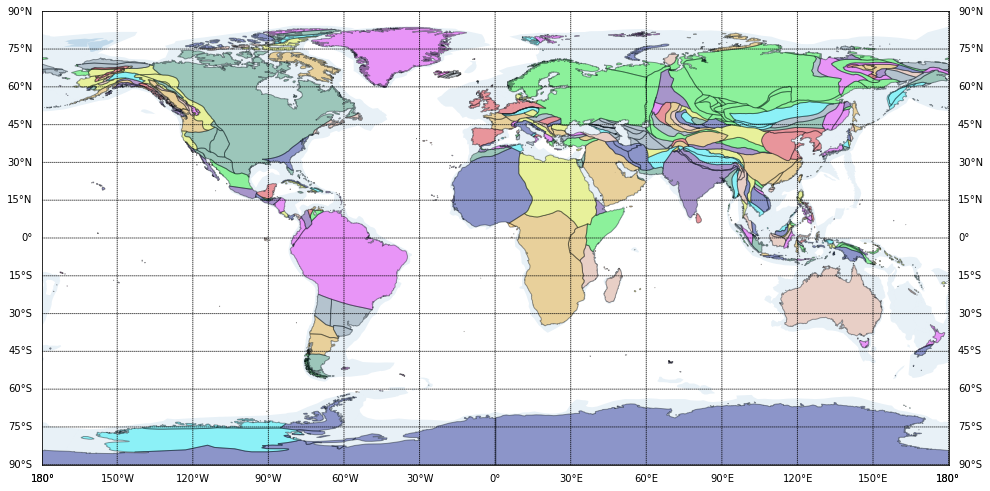

In [8]:
# Set up the figure
fig = plt.figure(figsize=(14,7))
fig.add_axes([0,0,0.9,1.0])

# Projections are rectangular, mollweide or robinson
m = tutorial.create_map('rectangular')

# You can plot different layers of information; we'll come back to that shortly
layers = [
    'coastlines',
    'continental_polygons',
]

tutorial.plot_layers(layers, m)
plt.show()

You can modify the code and rerun it to experiment with different parameters. For example, the below cell is identical to the one above, but instead of the 'rectangular' projection, we use 'robinson'. Try it and see!

Reconstructing coastlines...
Plotting coastlines...
Reconstructing continental polygons...
Plotting continental polygons...


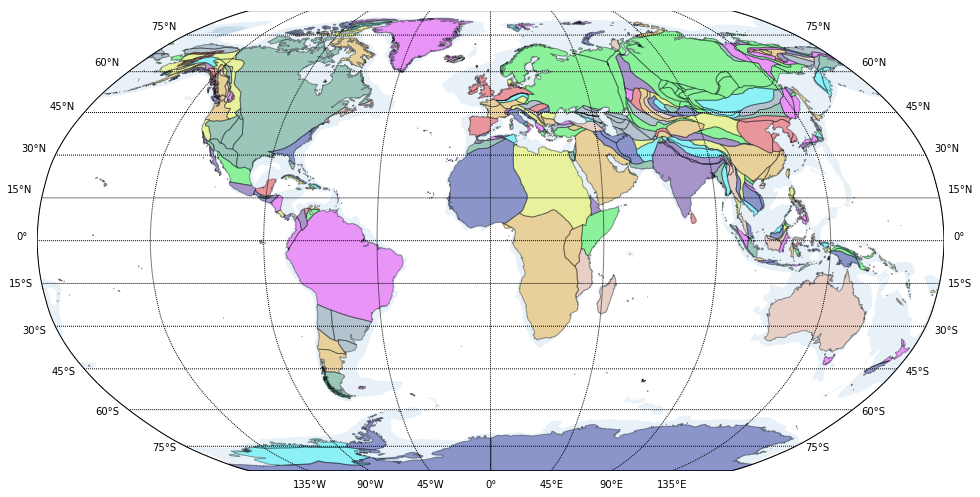

In [9]:
# Set up the figure
fig = plt.figure(figsize=(14,7))
fig.add_axes([0,0,0.9,1.0])

# Projections are rectangular, mollweide or robinson
m = tutorial.create_map('robinson')

# You can plot different layers of information; we'll come back to that shortly
layers = [
    'coastlines',
    'continental_polygons',
]

tutorial.plot_layers(layers, m)
plt.show()

There's also a 'mollweide' projection. Make a copy of the code in the empty cell below and try it out.

You can also add more layers to the plot to see more information. The layers are:
    
* ```coastlines```: outlines of the continents
* ```continental_polygons```: continental polygons
* ```topologies```: tectonic plate topologies
* ```fracture```: oceanic fracture zones
* ```magnetic```: magnetic picks
* ```cob```: continental ocean boundaries
* ```mineral```: mineral deposits
* ```velocities```: plate velocities

For example, the following plot shows the plate topologies and [fracture zones](https://en.wikipedia.org/wiki/Fracture_zone). 

In the code, we've uncommented (removed the ```#```) from before the layer name. The uncommented layers, highlighted in red, are the ones that will be plotted.

Reconstructing coastlines...
Plotting coastlines...
Resolving topologies
Plotting topologies...
Reconstructing fracture zones...
Plotting fracture zones...


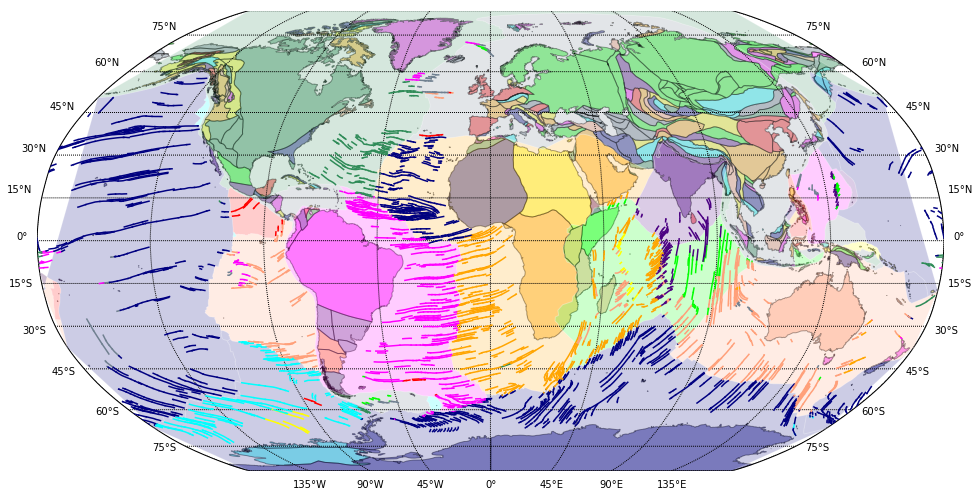

In [18]:
# Set up the figure
fig = plt.figure(figsize=(14,7))
fig.add_axes([0,0,0.9,1.0])

# Projections are rectangular, mollweide or robinson
m = tutorial.create_map('robinson')

# You can plot different layers of information. Just remove the # before the layer name.
layers = [
    'coastlines',
    #'continental_polygons',
    'topologies',
    'fracture',
    #'cob',
    #'velocities'
]

tutorial.plot_layers(layers, m)
plt.show()

## Earthquakes

We also have a database of detected earthquake events. Let's load it and investigate.

The database tells us where the earthquake was detected (latitude and longitude) and the magnitude of the earthquake on the Richter scale ([https://en.wikipedia.org/wiki/Richter_magnitude_scale](Wikipedia)).

A single point increase in magnitude on the Richter scale corresponds with a ten times increase in the amplitude of the waves of the earthquake. Hopefully larger earthquakes are more rare. Is this the case?

Loaded 11941 earthquakes


/usr/local/lib/python2.7/dist-packages/matplotlib/axes/_axes.py:6571: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


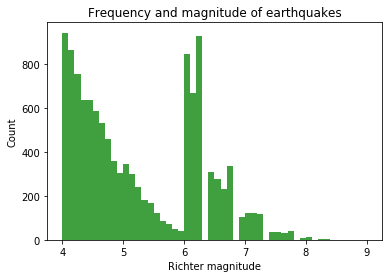

In [11]:
# Load the shape file containing the earthquake data
earthquakes = pygplates.FeatureCollection('Data/Earthquakes/earthquakes_new1.shp')
print "Loaded %s earthquakes" % len(earthquakes)

# Make a list of the magnitudes
magnitudes = [float(q.get_name()) for q in earthquakes]

# Plot a histogram of the magnitudes
n, bins, patches = plt.hist(magnitudes, 50, normed=False, facecolor='green', alpha=0.75)

# Label the plot
plt.title('Frequency and magnitude of earthquakes')
plt.xlabel('Richter magnitude')
plt.ylabel('Count')

# Show the plot
plt.show()

## Earthquakes on the map

We know that plate tectonics have some influence on the frequency and magnitude of earthquakes. Let's plot the earthquakes on the map.

Reconstructing coastlines...
Plotting coastlines...
Resolving topologies
Plotting topologies...


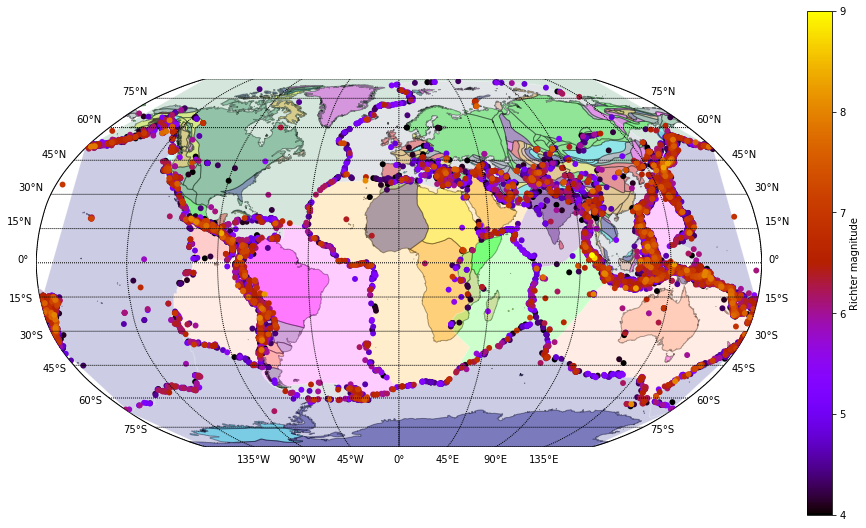

In [12]:
# Set up the figure
fig = plt.figure(figsize=(14,7))
fig.add_axes([0,0,0.9,1.0])

# Projections are rectangular, mollweide or robinson
m = tutorial.create_map('robinson')

# Remember, you can hide a layer by putting # in front of it
layers = [
    'coastlines',
    #'continental_polygons',
    'topologies',
    #'fracture',
    #'cob',
    #'velocities'
]

tutorial.plot_layers(layers, m)

# You can specify a minimum magnitude to plot with something like
#tutorial.plot_earthquakes(m, minmag=7.0)

# You can also specify a maximum magnitude with 'maxmag':
#tutorial.plot_earthquakes(m, maxmag=8.0)

# Or you can specify both:
# tutorial.plot_earthquakes(m, minmag=7.0, maxmag=8.0)

# By default, we plot all of them
tutorial.plot_earthquakes(m)
plt.show()

# Questions

* What sort of geological features or environments cause earthquakes? Use the other layers (fracture, cob, plate velocities) to assess where earthquakes are likely to occur in the future and their approximate magnitude.

(Hint: You can create new cells directly under this one to help you conduct your investigation and communicate your results! In the menu bar, go to ```Insert``` -> ```Insert Cell Below```.)